# CSE445 Assignment 1_Name: Ashraful Bhuyan Shuvon_ID: 1931405642

In [1]:
# importing librariess

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading excel file

In [2]:
df = pd.read_excel('CSE445_Assignment01.xlsx')


In [3]:
# printing first 10 rows

print(df.head(10))

                                       Clinical_text          Disease  \
0  35 years old Masuma Begum is seeing change in ...  Cronh's Disease   
1  Hanif Ahmed at the age of 55 presents to the c...  Cronh's Disease   
2  Apu Sarker is a male of 32 years having fecal ...  Cronh's Disease   
3  Samia Nasreen, a 24 years old female is having...  Cronh's Disease   
4  43 years old Babu Das comes to the clinic for ...  Cronh's Disease   
5  67 years old Abdullah is experiencing change i...  Cronh's Disease   
6  Ridita Haque, a 19 years old female is having ...  Cronh's Disease   
7  Nasir Hasan, a male of 60 years came to the cl...  Cronh's Disease   
8  Hiya Tabassum, 23 years old female is experien...  Cronh's Disease   
9  46 years old Runa Farhana presents to the clin...  Cronh's Disease   

                                            Symptoms  Height (m)  Weight (kg)  \
0                   ['burning sensations', 'sweats']        1.57           48   
1  ['bowel incontinence', 'swellin

In [4]:
# no of rows and cols

df.shape

(359, 6)

In [5]:
# checking missing values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clinical_text  359 non-null    object 
 1   Disease        359 non-null    object 
 2   Symptoms       354 non-null    object 
 3   Height (m)     359 non-null    float64
 4   Weight (kg)    359 non-null    int64  
 5   BMI            349 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.0+ KB
None


### Symptoms has 5 records with missing values. So, droping those 5 rows. 

In [6]:
# Droping rows with missing values using 'dropna()' method.


df.dropna(subset = ['Symptoms'], inplace = True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clinical_text  354 non-null    object 
 1   Disease        354 non-null    object 
 2   Symptoms       354 non-null    object 
 3   Height (m)     354 non-null    float64
 4   Weight (kg)    354 non-null    int64  
 5   BMI            344 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.4+ KB
None


### Printing count values to identify weather the dataset is balanced or not.

In [8]:
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Depression              60
Hay Fever               55
Parkinson's Disease     50
Stress                  50
Hepatitis B             50
Raynaud's phenomenon    50
Cronh's Disease         39
Name: Disease, dtype: int64


### Result: We can see that the dataset is not totally balanced. All the values are not similar. 

In [9]:
# Creating a New_df with Height, Weight, and BMI Columns


new_df = df[['Height', 'Weight', 'BMI']]

KeyError: "['Height', 'Weight'] not in index"

In [10]:
new_df = df[['Height (m)', 'Weight (kg)', 'BMI']]

In [11]:
# Printing new df for 10 rows.

print(new_df.head(10))

   Height (m)  Weight (kg)    BMI
0        1.57           48  19.47
1        1.55           60  24.97
2        1.61           82  31.63
3        1.78           70  22.09
4        1.58           84  33.65
5        1.80           64  19.75
6        1.76           63  20.34
7        1.64           55  20.45
8        1.76           57  18.40
9        1.69           51  17.86


### Converting the dataframe into numpy array. 

In [12]:
# Using to_numpy() method

np_array = new_df.to_numpy()

### Replacing missing BMI values.

In [13]:
# replaceing missing BMI values.


missing_bmi_values = np.isnan(np_array[:, 2])
np_array[missing_bmi_values, 2] = np_array[missing_bmi_values, 1] / (np_array[missing_bmi_values, 0] ) ^ 2


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [14]:
# replaceing missing BMI values.


missing_bmi_values = np.isnan(np_array[:, 2])
np_array[missing_bmi_values, 2] = np_array[missing_bmi_values, 1] / (np_array[missing_bmi_values, 0] ) ** 2


### Replacing the BMI column of the previous dataframe with newly obtained values.

In [15]:
updated_df = pd.DataFrame(np_array, columns=['Height (m)', 'Weight (kg)', 'BMI'])
new_df['BMI'] = updated_df['BMI']


/tmp/ipykernel_91949/1581743506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BMI'] = updated_df['BMI']


In [16]:
updated_df = pd.DataFrame(np_array, columns=['Height (m)', 'Weight (kg)', 'BMI'])
df['BMI'] = updated_df['BMI']


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clinical_text  354 non-null    object 
 1   Disease        354 non-null    object 
 2   Symptoms       354 non-null    object 
 3   Height (m)     354 non-null    float64
 4   Weight (kg)    354 non-null    int64  
 5   BMI            349 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.4+ KB
None


In [18]:
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Height (m)   354 non-null    float64
 1   Weight (kg)  354 non-null    float64
 2   BMI          354 non-null    float64
dtypes: float64(3)
memory usage: 8.4 KB
None


### Successfully replaced the missing values of the old BMI with updated BMI. 

In [19]:
print(updated_df.head(5))

   Height (m)  Weight (kg)    BMI
0        1.57         48.0  19.47
1        1.55         60.0  24.97
2        1.61         82.0  31.63
3        1.78         70.0  22.09
4        1.58         84.0  33.65


## Creating a Barplot Based on BMI Categories using matplotlib. 

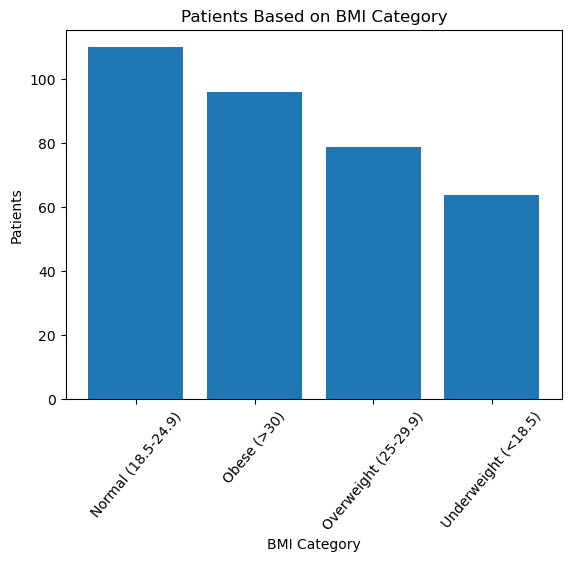

In [21]:

# Defineing BMI categories and labels
categories = ['Underweight (<18.5)', 'Normal (18.5-24.9)', 'Overweight (25-29.9)', 'Obese (>30)']

# patients based on BMI
df['BMI Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=categories)

# Count patients in each category
category_counts = df['BMI Category'].value_counts()

# Creating barplot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('BMI Category')
plt.ylabel('Patients')
plt.title('Patients Based on BMI Category')
plt.xticks(rotation=50)
plt.show()
